# 1. Generiranje linearno nerazdvojivih podataka

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import data

np.random.seed(100)
  
# get data
X,Y_ = data.sample_gmm_2d(4, 2, 30)
# X,Y_ = data.sample_gauss_2d(2, 100)

# get the class predictions
Y = data.myDummyDecision(X)>0.5  

# graph the decision surface
rect=(np.min(X, axis=0), np.max(X, axis=0))
data.graph_surface(data.myDummyDecision, rect, offset=0)
  
# graph the data points
data.graph_data(X, Y_, Y, special=[])

plt.show()


# 2. Višeslojna klasifikacija u Pythonu (20% bodova)

In [3]:
import fcann2

In [4]:
np.random.seed(100)
X,Y_ = data.sample_gmm_2d(6,2,10)
W2, b2, W1, b1 = fcann2.fcann2_train(X,Y_)


[[ 5.32541462  2.09720781]
 [ 5.93435063  5.41785058]
 [ 7.05230344  4.68946487]
 [ 5.72737617  5.37082561]
 [ 4.55758137  1.38281333]
 [ 6.13032153  2.24564803]
 [ 6.32631735 -0.10080164]
 [ 4.94883341  1.05820135]
 [ 5.40374791 -1.20496135]
 [ 6.57507436  5.68896838]
 [ 2.43629023  2.10951835]
 [-0.28175902  0.03115403]
 [ 0.68843321  1.35161025]
 [ 0.95066295  1.1847159 ]
 [ 3.44020112  4.32184664]
 [ 1.18449638  1.10889842]
 [-0.24049827  4.40121769]
 [ 1.17519795  2.50533689]
 [ 2.10855696  4.01005077]
 [ 2.23163105  0.42805802]
 [ 2.51778556  2.19958206]
 [ 2.05794984  1.5652956 ]
 [ 1.708401    1.60741831]
 [ 2.33508009  1.34119267]
 [ 2.27759705  1.36380237]
 [ 2.1651051   2.37893261]
 [ 2.34628363  2.11983684]
 [ 1.79573007  2.30652631]
 [ 2.28348886  2.03142079]
 [ 1.60179996  2.11359758]
 [ 1.96209692 -0.11471782]
 [ 0.885446    1.9327043 ]
 [ 0.65237392  1.77495797]
 [ 4.36913766  1.67700196]
 [ 1.68793462 -0.52733087]
 [ 2.32881921  1.0638152 ]
 [ 1.14048341  0.71005817]
 

# 3. Linearna regresija u PyTorchu (10% bodova)

In [3]:
import torch
import torch.nn as nn
import torch.optim as optim


## Definicija računskog grafa
# podaci i parametri, inicijalizacija parametara
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

X = torch.tensor([1, 2])
Y = torch.tensor([3, 5])

# optimizacijski postupak: gradijentni spust
optimizer = optim.SGD([a, b], lr=0.1)

for i in range(100):
    # afin regresijski model
    Y_ = a*X + b

    diff = (Y-Y_)

    # kvadratni gubitak
    loss = torch.sum(diff**2)

    # računanje gradijenata
    loss.backward()

    # korak optimizacije
    optimizer.step()

    # Postavljanje gradijenata na nulu
    optimizer.zero_grad()

    if i % 10 == 0:
        print(f'step: {i}, loss:{loss}, Y_:{Y_}, a:{a}, b:{b}')

step: 0, loss:61.55670166015625, Y_:tensor([-1.5730, -1.3753], grad_fn=<AddBackward0>), a:tensor([3.6624], requires_grad=True), b:tensor([0.4190], requires_grad=True)
step: 10, loss:0.1602749228477478, Y_:tensor([2.6592, 5.2101], grad_fn=<AddBackward0>), a:tensor([2.5350], requires_grad=True), b:tensor([0.1345], requires_grad=True)
step: 20, loss:0.08864262700080872, Y_:tensor([2.7467, 5.1565], grad_fn=<AddBackward0>), a:tensor([2.3978], requires_grad=True), b:tensor([0.3563], requires_grad=True)
step: 30, loss:0.049025315791368484, Y_:tensor([2.8117, 5.1164], grad_fn=<AddBackward0>), a:tensor([2.2959], requires_grad=True), b:tensor([0.5213], requires_grad=True)
step: 40, loss:0.027114223688840866, Y_:tensor([2.8599, 5.0866], grad_fn=<AddBackward0>), a:tensor([2.2200], requires_grad=True), b:tensor([0.6440], requires_grad=True)
step: 50, loss:0.014996014535427094, Y_:tensor([2.8958, 5.0644], grad_fn=<AddBackward0>), a:tensor([2.1636], requires_grad=True), b:tensor([0.7352], requires_gr

# Zadaci

Ponovite osnove PyTorcha navedene u odjeljcima 0b i 0c. Analizirajte prikazani program te provjerite ispravnost izvođenja.

Modificirajte program na način da se pravac može provući kroz proizvoljan broj točaka. Pripazite da iznosi gradijenata budu neovisni o broju podataka.

Ispišite vrijednosti gradijenata tijekom napredovanja postupka.

Odredite analitičke izraze za gradijente funkcije gubitka po parametrima a i b. Izračunajte eksplicitno te gradijente. Ispišite vrijednosti gradijenata i uvjerite se da odgovaraju onima koje automatski određuje PyTorch.

In [5]:
# -*- coding: utf-8 -*-
"""
Created on Mon Mar 14 18:27:22 2022

@author: Filip
"""

import torch
import torch.nn as nn
import torch.optim as optim

## Definicija računskog grafa
# podaci i parametri, inicijalizacija parametara
a = torch.randn(1, requires_grad=True)
b = torch.randn(1, requires_grad=True)

X = torch.tensor([1, 2])
Y = torch.tensor([3, 5])

# optimizacijski postupak: gradijentni spust
optimizer = optim.SGD([a, b], lr=0.1)

for i in range(100):
    # afin regresijski model
    Y_ = a * X + b

    diff = (Y-Y_)

    # srednji kvadratni gubitak - osiguran rad neovisno o broju ulaznih tocaka
    loss = torch.mean(diff**2) 

    # računanje gradijenata
    loss.backward()

    real_grad_a = 2 * torch.mean(-diff * X) 
    real_grad_b = 2 * torch.mean(-diff)
    if i % 10 == 0: 
        print(f'step: {i:2d}, loss: {loss:.6f}, PyTorch grad: a={a.grad.detach().numpy()[0]:.03f} b={b.grad.detach().numpy()[0]:.03f}, Analitički grad: a={real_grad_a:.03f} b={real_grad_b:.03f}')
    
    # korak optimizacije
    optimizer.step()

    # Postavljanje gradijenata na nulu
    optimizer.zero_grad()

step:  0, loss: 1.659470, PyTorch grad: a=4.034 b=2.534, Analitički grad: a=4.034 b=2.534
step: 10, loss: 0.003064, PyTorch grad: a=-0.016 b=0.025, Analitički grad: a=-0.016 b=0.025
step: 20, loss: 0.002284, PyTorch grad: a=-0.014 b=0.022, Analitički grad: a=-0.014 b=0.022
step: 30, loss: 0.001702, PyTorch grad: a=-0.012 b=0.019, Analitički grad: a=-0.012 b=0.019
step: 40, loss: 0.001268, PyTorch grad: a=-0.010 b=0.016, Analitički grad: a=-0.010 b=0.016
step: 50, loss: 0.000945, PyTorch grad: a=-0.009 b=0.014, Analitički grad: a=-0.009 b=0.014
step: 60, loss: 0.000705, PyTorch grad: a=-0.008 b=0.012, Analitički grad: a=-0.008 b=0.012
step: 70, loss: 0.000525, PyTorch grad: a=-0.007 b=0.011, Analitički grad: a=-0.007 b=0.011
step: 80, loss: 0.000391, PyTorch grad: a=-0.006 b=0.009, Analitički grad: a=-0.006 b=0.009
step: 90, loss: 0.000292, PyTorch grad: a=-0.005 b=0.008, Analitički grad: a=-0.005 b=0.008


# 4. Logistička regresija u PyTorchu (20% bodova)

In [12]:
import pt_logreg

# inicijaliziraj generatore slučajnih brojeva
np.random.seed(100)

# instanciraj podatke X i labele Yoh_
X,Y_ = data.sample_gmm_2d(4, 3, 5)
Yoh_ = data.class_to_onehot(Y_)

# definiraj model:
ptlr = pt_logreg.PTLogreg(X.shape[1], Yoh_.shape[1])

X = torch.from_numpy(X).float()
Yoh_ = torch.from_numpy(Yoh_).float()

In [13]:
param_lambda=0.0

iter: 0 loss: 7.279033
iter: 100 loss: 0.494304
iter: 200 loss: 0.472277
iter: 300 loss: 0.462226
iter: 400 loss: 0.456747
iter: 500 loss: 0.453423
iter: 600 loss: 0.451233
iter: 700 loss: 0.449687
iter: 800 loss: 0.448533
iter: 900 loss: 0.447630
Accuracy:  0.85
Precision & recall for class 0 :  (0.8, 0.8)
Precision & recall for class 1 :  (0.9, 0.8181818181818182)
Precision & recall for class 2 :  (0.8, 1.0)


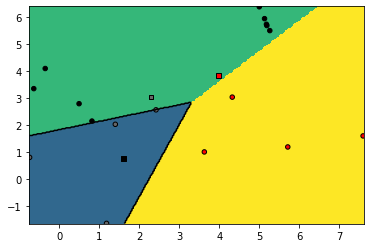

In [14]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

In [10]:
param_lambda=0.0001

iter: 0 loss: 0.452818
iter: 100 loss: 0.451547
iter: 200 loss: 0.450468
iter: 300 loss: 0.449540
iter: 400 loss: 0.448732
iter: 500 loss: 0.448022
iter: 600 loss: 0.447393
iter: 700 loss: 0.446833
iter: 800 loss: 0.446331
iter: 900 loss: 0.445879
Accuracy:  0.85
Precision & recall for class 0 :  (0.8, 0.8)
Precision & recall for class 1 :  (0.9, 0.8181818181818182)
Precision & recall for class 2 :  (0.8, 1.0)


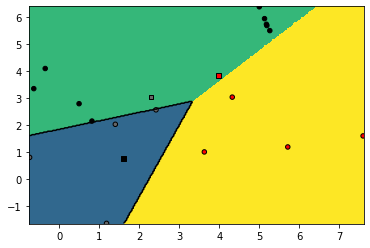

In [11]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

In [12]:
param_lambda=0.01

iter: 0 loss: 0.481230
iter: 100 loss: 0.480509
iter: 200 loss: 0.479971
iter: 300 loss: 0.479497
iter: 400 loss: 0.479064
iter: 500 loss: 0.478662
iter: 600 loss: 0.478288
iter: 700 loss: 0.477937
iter: 800 loss: 0.477608
iter: 900 loss: 0.477298
Accuracy:  0.8
Precision & recall for class 0 :  (0.6, 0.75)
Precision & recall for class 1 :  (0.9, 0.75)
Precision & recall for class 2 :  (0.8, 1.0)


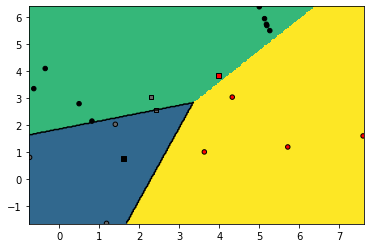

In [13]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

In [14]:
param_lambda=0.1

iter: 0 loss: 0.772568
iter: 100 loss: 0.717967
iter: 200 loss: 0.688611
iter: 300 loss: 0.671559
iter: 400 loss: 0.661604
iter: 500 loss: 0.655500
iter: 600 loss: 0.651460
iter: 700 loss: 0.648629
iter: 800 loss: 0.646599
iter: 900 loss: 0.645147
Accuracy:  0.8
Precision & recall for class 0 :  (0.6, 0.75)
Precision & recall for class 1 :  (0.9, 0.75)
Precision & recall for class 2 :  (0.8, 1.0)


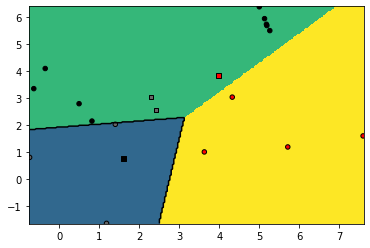

In [15]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

In [16]:
param_lambda=1.0

iter: 0 loss: 1.933658
iter: 100 loss: 1.102121
iter: 200 loss: 1.048048
iter: 300 loss: 1.056020
iter: 400 loss: 1.056057
iter: 500 loss: 1.056115
iter: 600 loss: 1.056127
iter: 700 loss: 1.056129
iter: 800 loss: 1.056129
iter: 900 loss: 1.056129
Accuracy:  0.55
Precision & recall for class 0 :  (0.0, nan)
Precision & recall for class 1 :  (1.0, 0.5263157894736842)
Precision & recall for class 2 :  (0.2, 1.0)


C:\Users\Filip\git\DU\lab1\data.py:132: RuntimeWarning: invalid value encountered in longlong_scalars
  precision_i = tp_i / (tp_i + fp_i)
C:\Users\Filip\git\DU\lab1\data.py:73: UserWarning: No contour levels were found within the data range.
  plt.contour(xx0, xx1, values, colors='black', levels=[offset])


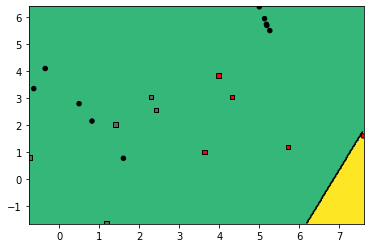

In [17]:
# nauči parametre (X i Yoh_ moraju biti tipa torch.Tensor):
ptlr.train(X, Yoh_, 1000, 0.1, param_lambda)

# dohvati vjerojatnosti na skupu za učenje
probs = ptlr.evaluate(X.detach().numpy())

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptlr.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

# 5. Konfigurabilni duboki modeli u PyTorchu (20% bodova)

iter:  0  loss:  tensor(2.0593, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  100  loss:  tensor(0.5743, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  200  loss:  tensor(0.5174, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  300  loss:  tensor(0.4927, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  400  loss:  tensor(0.4794, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  500  loss:  tensor(0.4712, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  600  loss:  tensor(0.4657, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  700  loss:  tensor(0.4617, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  800  loss:  tensor(0.4588, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  900  loss:  tensor(0.4564, dtype=torch.float64, grad_fn=<MulBackward0>)
Accuracy:  0.85
Precision & recall for class 0 :  (0.8, 0.8)
Precision & recall for class 1 :  (0.9, 0.8181818181818182)
Precision & recall for class 2 :  (0.8, 1.0)


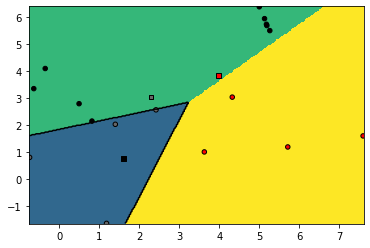

In [31]:
import pt_deep

# inicijaliziraj generatore slučajnih brojeva
np.random.seed(100)

# instanciraj podatke X i labele Yoh_
X,Y_ = data.sample_gmm_2d(4, 3, 5)
Yoh_ = data.class_to_onehot(Y_)

# definiraj model:
parameter_list = [2, 3]
ptd = pt_deep.PTDeep(parameter_list)

X = torch.from_numpy(X)
Yoh_ = torch.from_numpy(Yoh_)

ptd.train(X, Yoh_, 1000, 0.1)

# dohvati vjerojatnosti na skupu za učenje
probs = ptd.evaluate(X)

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(3):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()

Rezultat pokretanja modela PTDeep s konfiguracijom [2,3] jednak je kao i kod implementacije logističke regresije.

In [29]:
print(pt_deep.count_parameters(ptd))

AttributeError: module 'pt_deep' has no attribute 'count_parameters'

iter:  0  loss:  tensor(0.6957, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  100  loss:  tensor(0.6902, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  200  loss:  tensor(0.6862, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  300  loss:  tensor(0.6817, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  400  loss:  tensor(0.6753, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  500  loss:  tensor(0.6697, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  600  loss:  tensor(0.6651, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  700  loss:  tensor(0.6611, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  800  loss:  tensor(0.6575, dtype=torch.float64, grad_fn=<MulBackward0>)
iter:  900  loss:  tensor(0.6542, dtype=torch.float64, grad_fn=<MulBackward0>)
Accuracy:  0.6666666666666666
Precision & recall for class 0 :  (0.9, 0.6136363636363636)
Precision & recall for class 1 :  (0.43333333333333335, 0.8125)


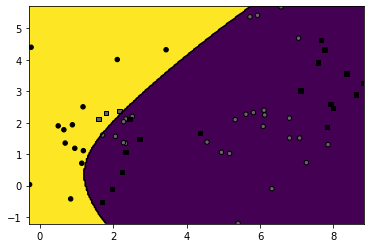

In [67]:
import pt_deep

np.random.seed(100)

X,Y_ = data.sample_gmm_2d(6, 2, 10)
Yoh_ = data.class_to_onehot(Y_)

def activation(X):
    return torch.sigmoid(X)

# definiraj model:
parameter_list = [2, 10, 10, 2]
ptd = pt_deep.PTDeep(parameter_list, activation)

X = torch.from_numpy(X)
Yoh_ = torch.from_numpy(Yoh_)

ptd.train(X, Yoh_, 1000, 0.1, 0.001)

# dohvati vjerojatnosti na skupu za učenje
probs = ptd.evaluate(X)

# ispiši performansu (preciznost i odziv po razredima)
accuracy, pr, M = data.eval_perf_multi(probs, Y_)
print("Accuracy: ", accuracy)
for i in range(2):
    print("Precision & recall for class", i, ": ", pr[i])


# iscrtaj rezultate, decizijsku plohu
rect = (np.min(X.numpy(), axis=0), np.max(X.numpy(), axis=0))
data.graph_surface(lambda X: ptd.evaluate(X), rect)
data.graph_data(X, Y_, probs)
plt.show()